In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import astropy
from astropy.io import fits
from astropy import cosmology
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
cosmo = FlatLambdaCDM(H0=75. * u.km / u.s / u.Mpc, Om0=0.31)
c = 299792.458

In [2]:
fuji_pv = pd.read_csv("fuji_pv.csv")
fuji_pv

,#fibermap_targetid,fibermap_i,ra_1,dec_1,targetid_1,id,healpix,survey,program,targetid.1,...,Sn,logdist,logdist_err,logdist_alpha,pv,pverr,logdist_corr,logdist_err_corr,pv_corr,pverr_corr
0,39628417112478213,400,192.260477,26.893112,39628417112478213,1301,28148,sv1,bright,39628417112478213,...,1.000000,0.033927,0.095410,-0.097184,594.976580,1673.185069,0.028089,0.095436,492.592489,1673.636744
1,39628417133447721,426,193.579225,27.068031,39628417133447721,1304,28149,sv1,bright,39628417133447721,...,1.000000,0.187536,0.095063,0.167988,3694.813008,1872.927512,0.181698,0.095089,3579.788500,1873.436801
2,39627769709071900,191,184.913600,-0.750861,39627769709071900,1516,26254,sv1,bright,39627769709071900,...,1.000000,-0.109745,0.095280,-0.337974,-2337.559597,2029.441278,-0.115584,0.095305,-2461.913386,2029.990625
3,39633076111803113,63,119.188267,39.927879,39633076111803113,996,6541,sv1,bright,39633076111803113,...,1.000000,0.000921,0.099558,0.342711,8.263345,893.485385,-0.004917,0.099583,-44.132184,893.706904
4,39628422523128777,203,193.922076,27.250763,39628422523128777,1304,28149,sv1,bright,39628422523128777,...,1.000000,-0.056939,0.095488,-0.182259,-961.881804,1613.103899,-0.062777,0.095514,-1060.508710,1613.538643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3191,39633236212580575,207,173.537567,49.254544,39633236212580575,2614,5618,sv2,bright,39633236212580575,...,0.778542,0.025256,0.100769,-0.310789,654.810824,2612.689229,0.019417,0.100794,503.440410,2613.321503
3192,39627658551629973,143,33.020696,-5.209266,39627658551629973,1090,17701,sv1,bright,39627658551629973,...,1.000000,0.062590,0.097500,-0.296589,1759.218066,2740.431622,0.056752,0.097525,1595.122901,2741.140025
3193,39627598560494826,238,36.342130,-7.851704,39627598560494826,1185,36783,sv1,bright,39627598560494826,...,1.000000,0.110118,0.099183,-0.223999,2895.751478,2608.189607,0.104280,0.099208,2742.224729,2608.841143
3194,39633255741260888,1028,172.667534,50.617933,39633255741260888,2623,5615,sv2,bright,39633255741260888,...,1.000000,0.305660,0.100221,-0.219622,12189.675124,3996.803359,0.299822,0.100246,11956.846716,3997.781204


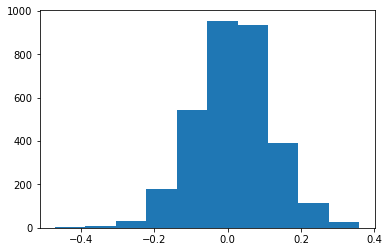

In [17]:
plt.hist(fuji_pv["logdist_corr"])
plt.show()

In [3]:
# hdu = fits.open('./Coma_chris/coma_filtered_inturnaround_desi.fits')
# t = hdu[1].data
# target_id = t['target_id']
# target_id

array([39628438616676024, 39628438616675858, 39628438616675869, ...,
       39628422497963985, 39628411722793166, 39628427870865661])

In [8]:
coma_desi = pd.read_csv("./Coma_chris/coma_desi.csv")
coma_desi

,target_id,sdss_id,ra,dec,z,z_err,spectype,survey,program,MASKBITS,...,lum_r,lum_z,in_desi,in_sdss,coma_fof,stillinsample,in_turnaround,delta_R,delta_v,vel
0,39628438616676024,0,194.95247,27.982782,0.017865,0.000071,GALAXY,sv3,bright,0,...,5.415526e+08,6.438666e+08,True,False,True,True,True,0.003822,-1623.10830,5307.9717
1,39628438616675858,1237667444048658525,194.94493,27.973840,0.031485,0.000012,GALAXY,sv3,bright,4096,...,1.492407e+10,2.261809e+10,True,True,True,True,True,0.016456,2361.63450,9290.3710
2,39628438616675869,1237667324334571832,194.94559,27.991917,0.027993,0.000047,GALAXY,sv3,bright,0,...,8.298975e+08,1.117166e+09,True,True,True,True,True,0.022102,1344.97990,8274.5230
3,39628438616675853,0,194.94467,28.000118,0.020665,0.000057,GALAXY,sv3,bright,0,...,5.324131e+08,6.815519e+08,True,False,True,True,True,0.035290,-799.68450,6131.1187
4,39628438616676526,0,194.97472,27.970484,0.022671,0.000039,GALAXY,sv3,bright,0,...,6.044809e+08,8.308895e+08,True,False,True,True,True,0.036739,-210.89550,6719.6430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1509,39628427870867668,0,192.36333,27.397417,0.027632,0.000013,GALAXY,sv1,bright,0,...,1.665890e+08,1.897964e+08,True,False,True,True,True,4.002173,1239.89260,8169.5260
1510,39628422502154453,1237667442973933711,192.36550,27.267616,0.026605,0.000007,GALAXY,sv1,bright,4096,...,5.234681e+09,7.396889e+09,True,True,True,True,True,4.061020,940.00946,7869.8545
1511,39628422497963985,1237667323259846710,192.28682,27.368748,0.022051,0.000004,GALAXY,sv1,bright,4112,...,1.259294e+10,1.896506e+10,True,True,True,True,True,4.125874,-392.65826,6537.9510
1512,39628411722793166,0,192.58960,26.694790,0.018734,0.000097,GALAXY,sv1,dark,0,...,7.940511e+06,9.327427e+06,True,False,True,True,True,4.164350,-1367.19190,5563.8086


In [9]:
coma_merged = pd.merge(fuji_pv, coma_desi, left_on='targetid_1', right_on='target_id')

In [10]:
coma_merged

,#fibermap_targetid,fibermap_i,ra_1,dec_1,targetid_1,id,healpix,survey_x,program_x,targetid.1,...,lum_r,lum_z,in_desi,in_sdss,coma_fof,stillinsample,in_turnaround,delta_R,delta_v,vel
0,39628417133447721,426,193.579225,27.068031,39628417133447721,1304,28149,sv1,bright,39628417133447721,...,9.881991e+10,1.523824e+11,True,False,True,True,True,2.573793,1292.321400,8221.9330
1,39628422523128777,203,193.922076,27.250763,39628422523128777,1304,28149,sv1,bright,39628422523128777,...,2.967021e+10,4.544369e+10,True,True,True,True,True,1.976813,80.049710,7010.4140
2,39628438608283113,309,194.221420,27.929491,39628438608283113,1267,10400,sv1,bright,39628438608283113,...,7.237596e+09,1.118884e+10,True,True,True,True,True,1.095812,-847.648250,6083.1720
3,39628443939243735,11,193.999798,28.186935,39628443939243735,1267,10400,sv1,bright,39628443939243735,...,4.648998e+09,6.833008e+09,True,True,True,True,True,1.463908,-1387.885400,5543.1180
4,39628438604091708,1276,194.124215,27.939990,39628438604091708,3319,10400,sv3,bright,39628438604091708,...,1.332269e+10,2.021530e+10,True,True,True,True,True,1.239415,-353.409730,6577.2030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,39628438620864788,2184,194.986067,27.930032,39628438620864788,3176,10379,sv3,bright,39628438620864788,...,8.085169e+09,1.181922e+10,True,True,True,True,True,0.098732,698.548300,7628.5540
220,39628438616676154,76,194.958779,27.924850,39628438616676154,3176,10379,sv3,bright,39628438616676154,...,3.137109e+09,4.588731e+09,True,True,True,True,True,0.094578,2736.045700,9664.4230
221,39628411743768113,817,194.179984,26.741948,39628411743768113,3421,28127,sv3,bright,39628411743768113,...,3.318638e+09,4.450853e+09,True,True,True,True,True,2.394548,-59.167076,6871.2935
222,39628417133449045,156,193.653392,26.934850,39628417133449045,3418,28149,sv3,bright,39628417133449045,...,1.670891e+10,2.352247e+10,True,True,True,True,True,2.632301,-1043.372400,5887.5180


In [15]:
cosmo_2 = FlatLambdaCDM(H0=100. * u.km / u.s / u.Mpc, Om0=0.31)

In [19]:
dz_l = cosmo_2.angular_diameter_distance(coma_merged.zcmb).value
dz = cosmo_2.comoving_distance(coma_merged.zcmb)
print (dz)
d_coma = 10**(np.log10(dz) - coma_merged.logdist_corr)
mu = 5.*np.log10(d_coma)+25.
print (np.median(d_coma), "+/-",np.std(d_coma)/np.sqrt(len(d_coma)),"Mpc/h")
print (np.median(10**(np.log10(dz_l) - coma_merged.logdist_corr)))
print (len(d_coma))
print (np.mean(mu))

0       85.616520
1       73.399488
2       63.824349
3       58.428519
4       68.894171
          ...    
219     79.528138
220    100.222618
221     71.911709
222     61.961483
223     59.546808
Name: zcmb, Length: 224, dtype: float64
81.36069651287067 +/- 1.290515303883465 Mpc/h
80.11362923038996
224
34.51539615087241


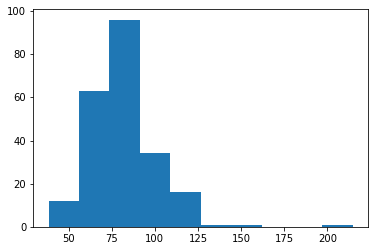

In [18]:
plt.hist(d_coma)
plt.show()